In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches

In [2]:
import numpy as np
from numpy import ma

import pandas as pd
from pandas import DataFrame, Series  
import pims
import trackpy as tp

import cv2

import scipy
from scipy import signal
from scipy import ndimage

from math import sqrt

import skimage
from skimage import morphology, util
from skimage import filters
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

In [3]:
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(30,20))
mpl.rc('image', cmap='gray')

In [4]:
path='E:/Hard Drive Quincke Rotation/2019-02-05/150V.mov'

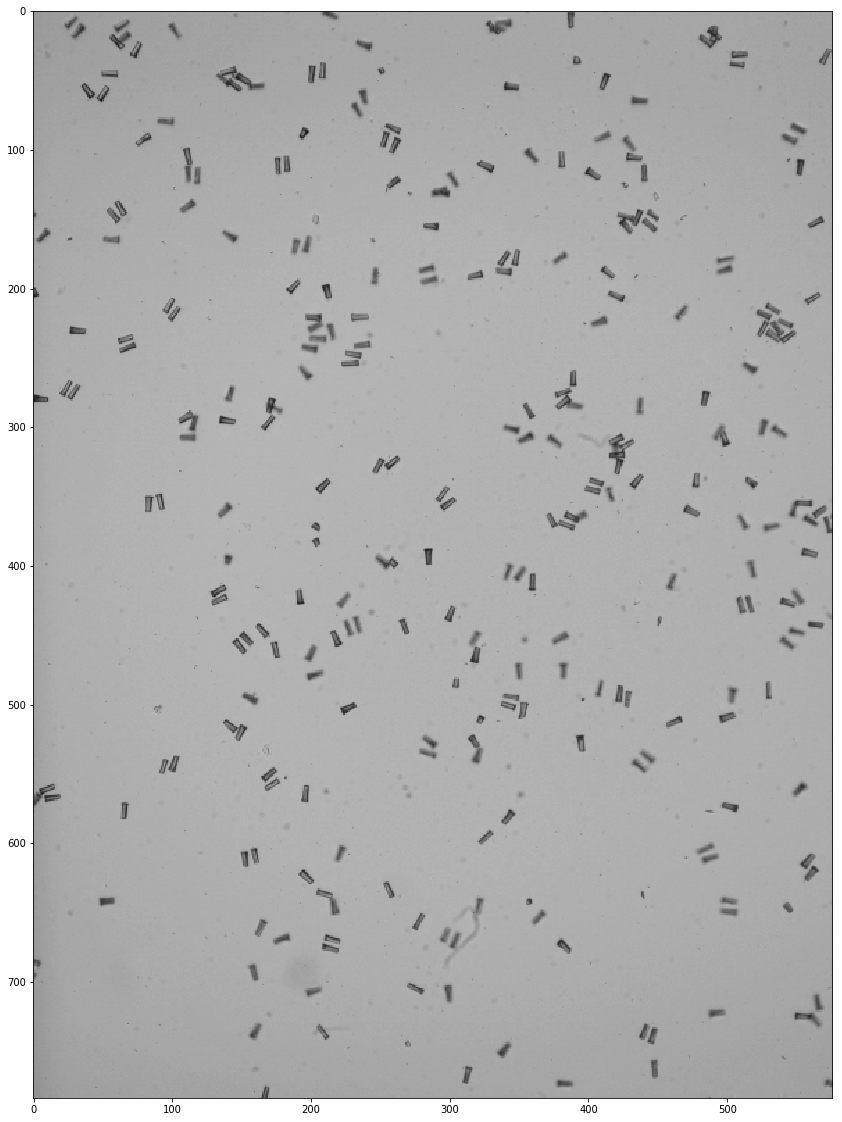

In [5]:
p = pims.Video(path)

plt.imshow(p[1])

In [6]:
length=len(p)-1
length

4300

In [8]:
leg=1000

In [9]:
zoom=2
fps=500

In [10]:
gap=int(length/leg)
gap

4

In [11]:
#p1=[]
#p1=p[:][::gap]

In [12]:
iframe=200
gap=1
p1=[]
p1=p[iframe:(gap*leg)+iframe][::gap]

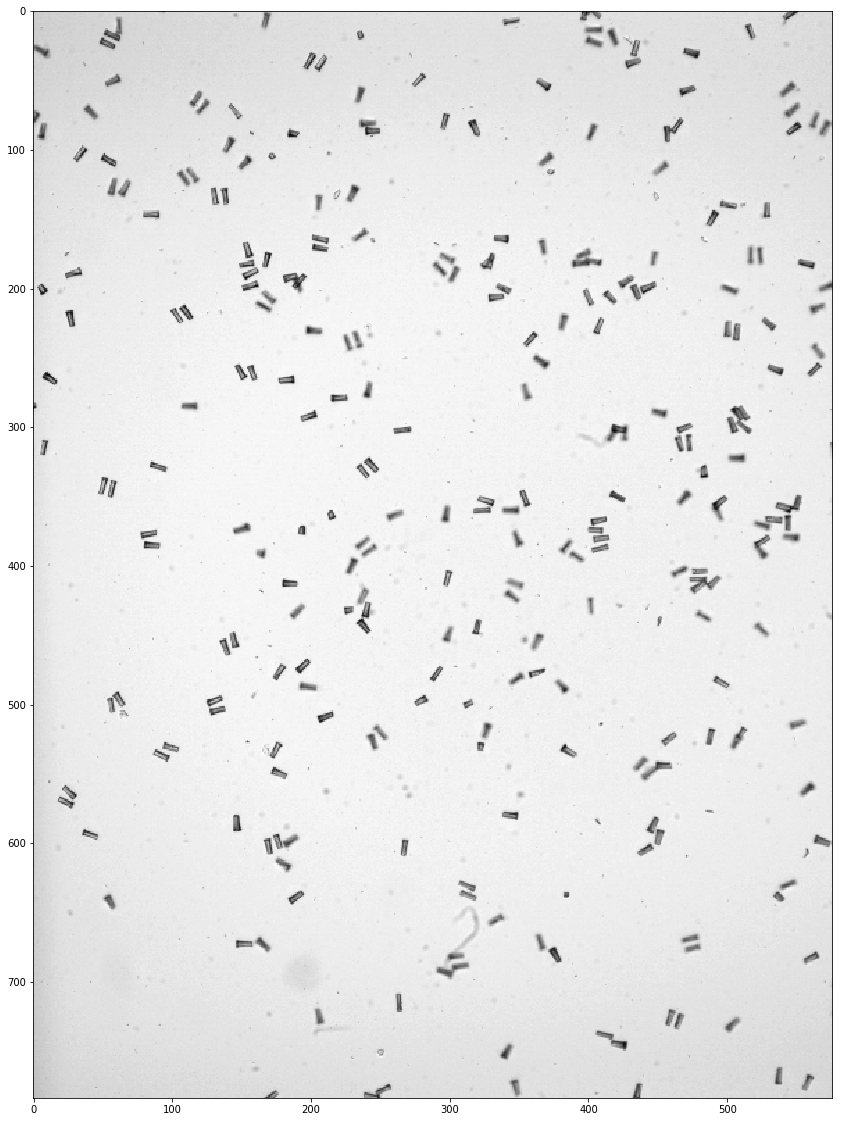

In [13]:
pp=[]

for i in range (leg):
    pp.append(p1[i][:,:,0])
    
plt.imshow(pp[9])

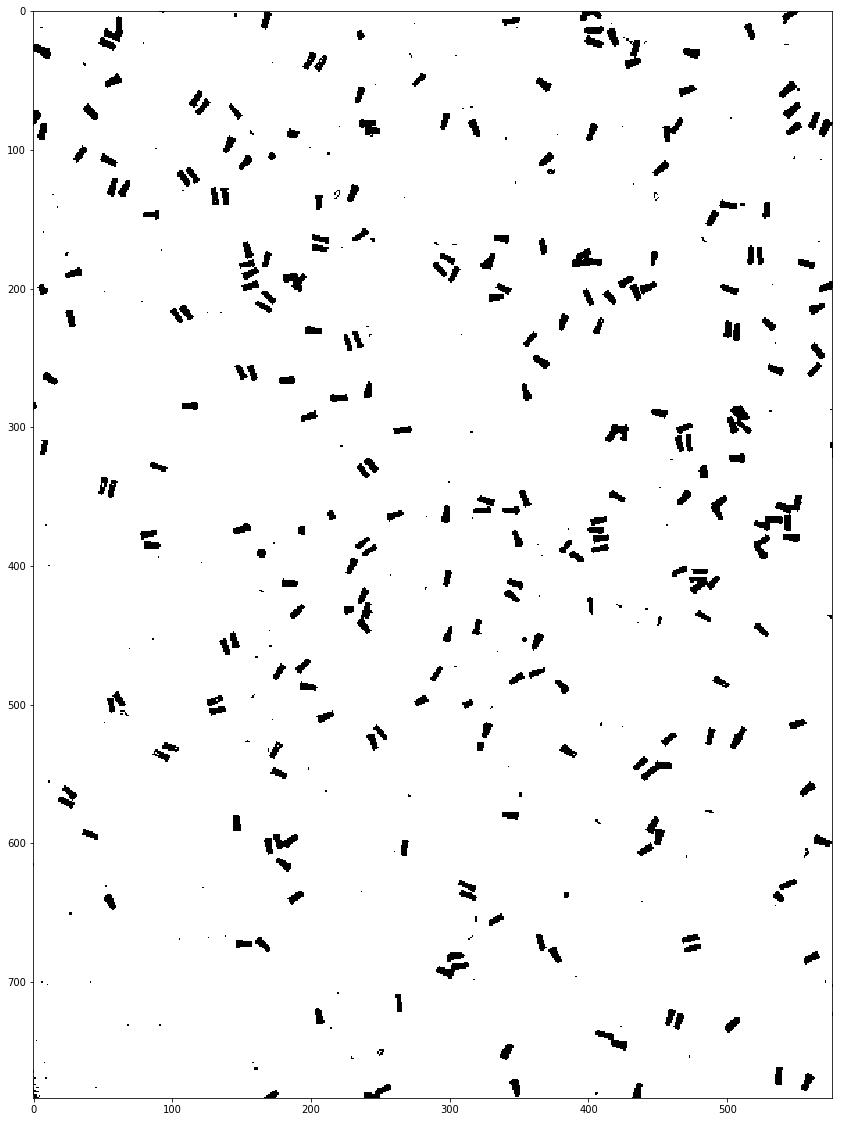

In [14]:
pb=[]
for i in range (0,leg):
    ret,pbinary= cv2.threshold(pp[i],145,255,cv2.THRESH_BINARY)
    pb.append(pbinary)

plt.imshow(pb[9])

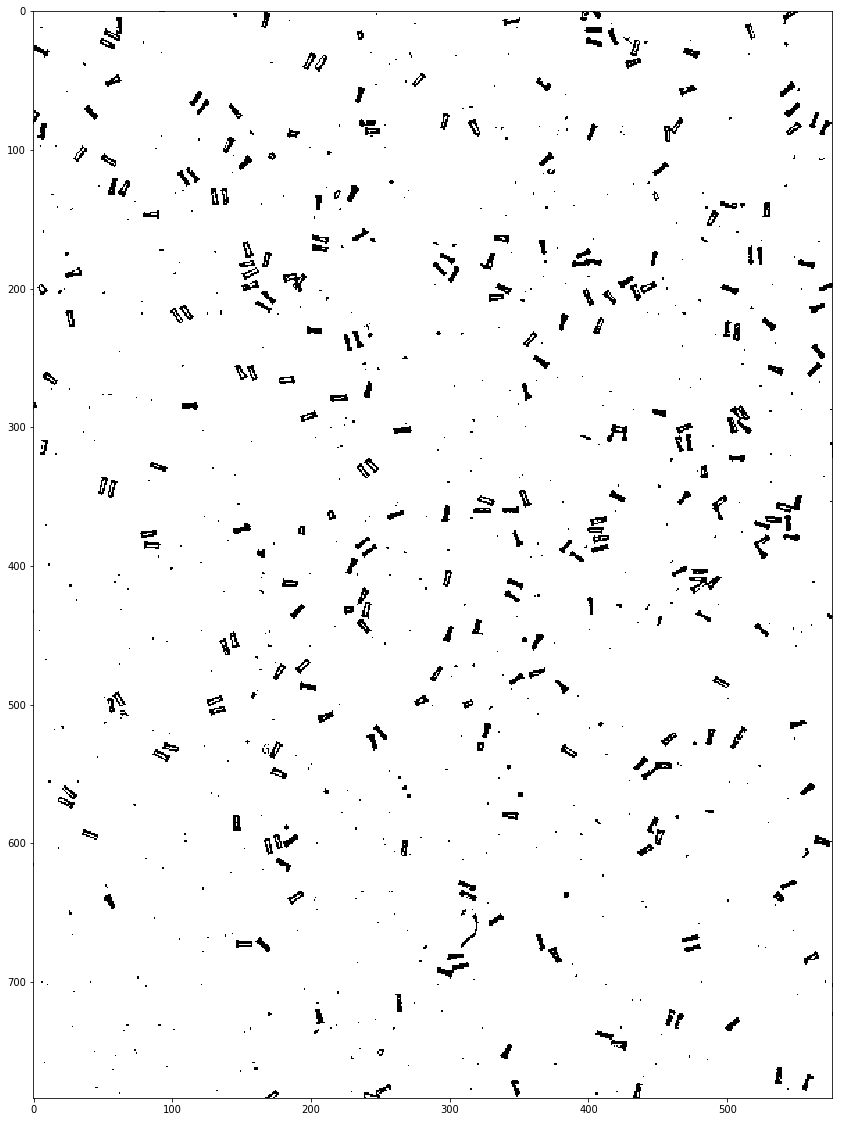

In [18]:
ppp=cv2.adaptiveThreshold(pp[9],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,9)

plt.imshow(ppp)

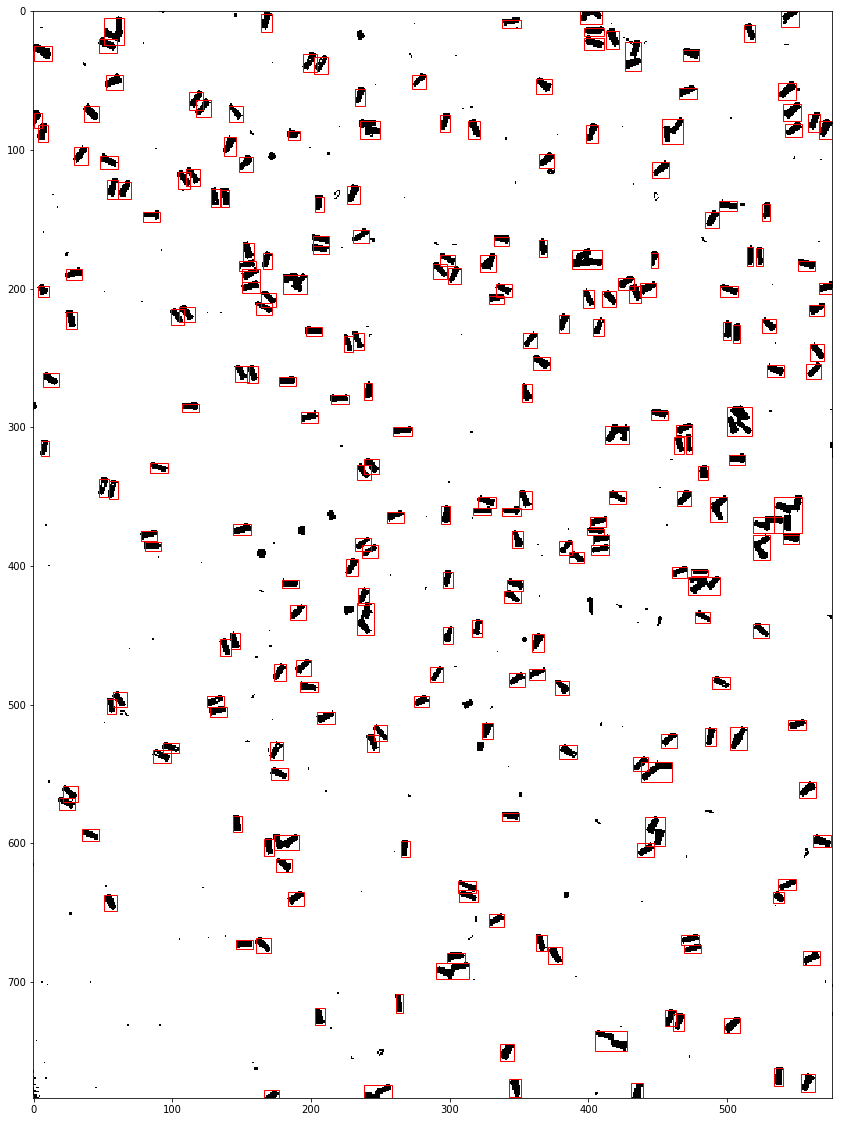

In [19]:
img_example = pb[9]

# Label elements on the picture
label_image = skimage.measure.label(img_example,connectivity=1,background=-1)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 20))
ax.imshow(img_example)
for region in skimage.measure.regionprops(label_image, intensity_image=img_example):
    if region.area < 25 or region.area > 800:
        continue
    if region.mean_intensity > 1:
        continue
    if region.centroid[0] < 700 and region.area < 40:
        continue
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=1)

    ax.add_patch(rect)

In [21]:
f = pd.DataFrame()
for num, img in enumerate(pb):
    label_image = skimage.measure.label(img,connectivity=1,background=-1)
    for region in skimage.measure.regionprops(label_image, intensity_image=img):
        if region.area < 25 or region.area > 800:
            continue
        if region.mean_intensity > 1:
            continue
        if region.centroid[0] < 700 and region.area < 40:
            continue
        f = f.append([{'y': region.centroid[0],'x': region.centroid[1], 'frame': num,},])

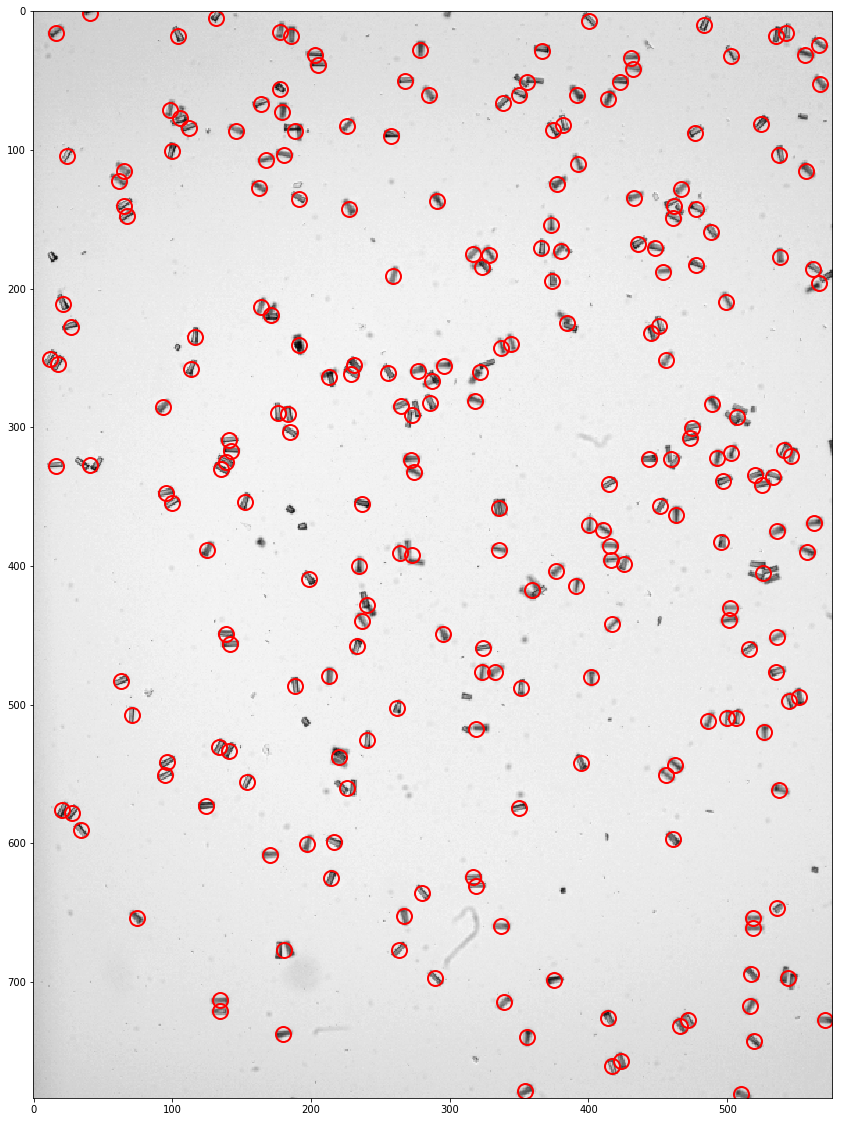

In [40]:
tp.annotate(f[f.frame==200], pp[200])

In [116]:
#f

In [91]:
#f = tp.batch(pb[:], 45,invert=True,noise_size=5);

In [115]:
t = tp.link_df(f, 8, memory=10)

Frame 999: 239 trajectories present.


In [116]:
t1 = tp.filter_stubs(t, 100)

print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 9801
After: 432


In [119]:
#t1

In [120]:
#plt.figure()
#tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [121]:
#tt = t1[((t1['mass'] > 8000) & (t1['size'] < 8.25) &
#        (t1['ecc'] < 0.1))]

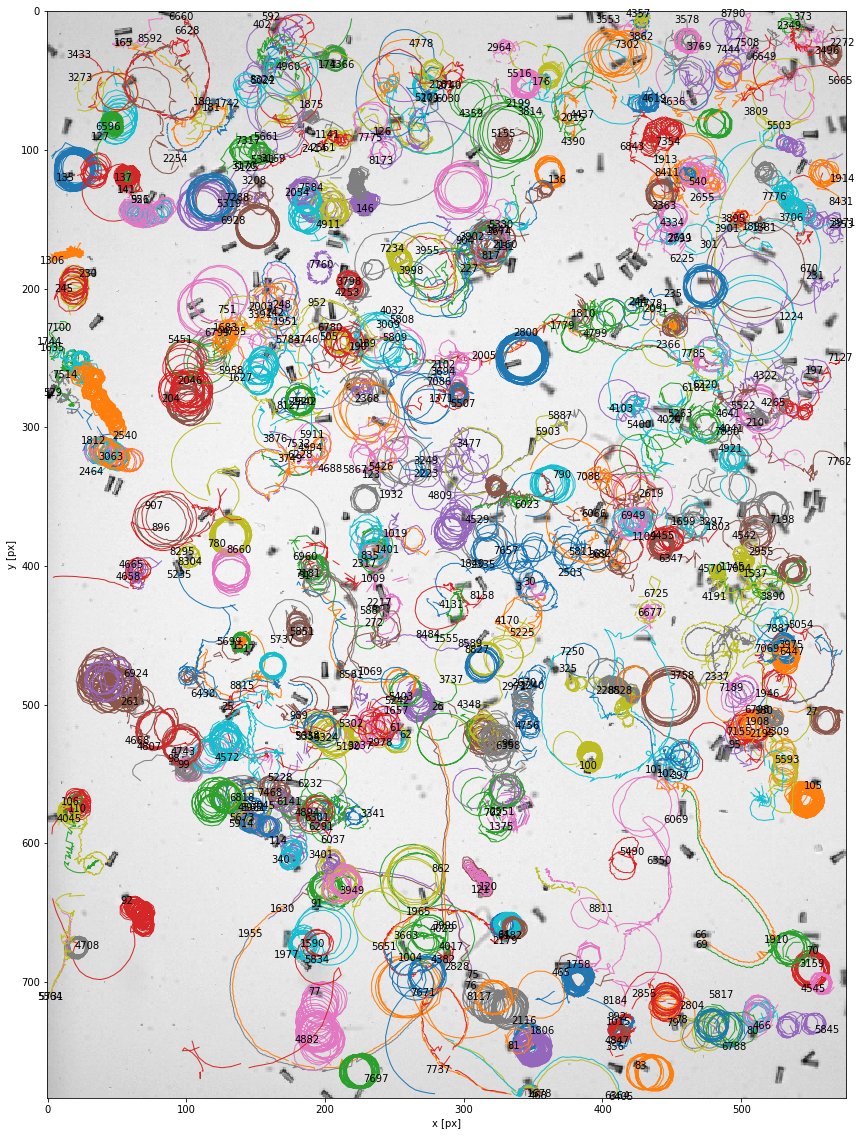

In [117]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.imshow(pp[0])
tp.plot_traj(t1, label=True)

In [91]:
plist=t1['particle'].values
plist=set(plist)
plist=list(plist)

len(plist)

204

In [46]:
#for i in plist[:]:

#    fig, ax = plt.subplots(figsize=(5, 5))
    
#    ax.plot(t1[t1['particle']==i]['x'].values,t1[t1['particle']==i]['y'].values, color=(0,1,1), alpha=1)  
#    ax.set_aspect(1.0)

In [104]:
circle=[12121,12012]

#t31=[]

#for i in circle[:]:
#    t31.append(t1[(t1['particle']==i)])

#t3 = pd.concat(t31)

#plt.figure()
#plt.ylim(800,0)
#plt.xlim(0,1200)
#tp.plot_traj(t3,label=True);


In [105]:
dik={}
for i in plist[:]:
    dik["pfreal{0}".format(i)]=t1[t1['particle']==i]['frame'].values
    dik["px{0}".format(i)]=t1[t1['particle']==i]['x'][::1].values
    dik["py{0}".format(i)]=t1[t1['particle']==i]['y'][::1].values
    dik["pf{0}".format(i)]=t1[t1['particle']==i]['frame'][::1].values
    dik["smpx{0}".format(i)]=signal.savgol_filter( dik["px{0}".format(i)], 5, 2)
    dik["smpy{0}".format(i)]=signal.savgol_filter( dik["py{0}".format(i)], 5, 2)
    dik["velo{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-1)
    dik["vex{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-1)
    dik["vey{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-1)
    dik["d2s{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-2)
    dik["d2x{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-2)
    dik["d2y{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-2)
    dik["cur{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-2)
    dik["rad{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-2)
    for j in range(len(dik["pf{0}".format(i)])-1):
        dik["velo{0}".format(i)][j]=np.sqrt(( dik["smpy{0}".format(i)][j+1]- dik["smpy{0}".format(i)][j])**2 \
                                           +( dik["smpx{0}".format(i)][j+1]- dik["smpx{0}".format(i)][j])**2)\
                                           /(dik["pf{0}".format(i)][j+1]-dik["pf{0}".format(i)][j])*zoom *fps/gap
        dik["vex{0}".format(i)][j]=(dik["smpx{0}".format(i)][j+1]- dik["smpx{0}".format(i)][j])\
                                          /(dik["pf{0}".format(i)][j+1]-dik["pf{0}".format(i)][j])*zoom *fps/gap
        dik["vey{0}".format(i)][j]=(dik["smpy{0}".format(i)][j+1]- dik["smpy{0}".format(i)][j])\
                                          /(dik["pf{0}".format(i)][j+1]-dik["pf{0}".format(i)][j])*zoom *fps/gap
    
    for k in range(len(dik["pf{0}".format(i)])-2):
        dik["d2s{0}".format(i)][k]=(dik["velo{0}".format(i)][k+1]- dik["velo{0}".format(i)][k])\
                                           /(dik["pf{0}".format(i)][k+1]-dik["pf{0}".format(i)][k])*fps/gap
        dik["d2x{0}".format(i)][k]=(dik["vex{0}".format(i)][k+1]- dik["vex{0}".format(i)][k])\
                                            /(dik["pf{0}".format(i)][k+1]-dik["pf{0}".format(i)][k])*fps/gap
        dik["d2y{0}".format(i)][k]=(dik["vey{0}".format(i)][k+1]- dik["vey{0}".format(i)][k])\
                                            /(dik["pf{0}".format(i)][k+1]-dik["pf{0}".format(i)][k])*fps/gap
    
        dik["cur{0}".format(i)][k]=np.abs(dik["d2x{0}".format(i)][k] * dik["vey{0}".format(i)][k] \
                                   - dik["vex{0}".format(i)][k]* dik["d2y{0}".format(i)][k])\
                        / (dik["vex{0}".format(i)][k] * dik["vex{0}".format(i)][k] \
                           + dik["vey{0}".format(i)][k] * dik["vey{0}".format(i)][k])**1.5
    dik["rad{0}".format(i)]=1/dik["cur{0}".format(i)]

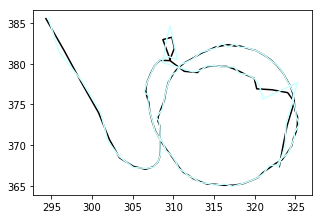

In [106]:
trial=circle[0]

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(   dik["smpx{0}".format(trial)], dik["smpy{0}".format(trial)], color=(0,0,0), alpha=1)  
ax.plot(  dik["px{0}".format(trial)],dik["py{0}".format(trial)], color=(0.8,1,1), alpha=1)  
ax.set_aspect(1.0)

In [101]:
#veloarray = np.array([ [dik["vex{0}".format(trial)][i], dik["vey{0}".format(trial)][i]] for i in range(dik["vex{0}".format(trial)].size)])

#veloarray

In [765]:
#tangent = np.array([1/dik["velo{0}".format(trial)]] * 2).transpose() * veloarray

#tangent

In [766]:
#tangent_x = tangent[:, 0]
#tangent_y = tangent[:, 1]

#deriv_tangent_x = np.gradient(tangent_x)
#deriv_tangent_y = np.gradient(tangent_y)

#dT_dt = np.array([ [deriv_tangent_x[i], deriv_tangent_y[i]] for i in range(deriv_tangent_x.size)])

#length_dT_dt = np.sqrt(deriv_tangent_x * deriv_tangent_x + deriv_tangent_y * deriv_tangent_y)

#normal = np.array([1/length_dT_dt] * 2).transpose() * dT_dt

#normal

In [64]:
#fig, ax = plt.subplots()
#ax.plot(  dik["pf{0}".format(trial)][:len(dik["pf{0}".format(trial)])-2],dik["rad{0}".format(trial)], color=(0,0,0), alpha=1)  

#plt.ylim(5,185)
#lt.xlim(0,150)

In [65]:
#print ("radius",float(sum(dik["rad{0}".format(trial)]))/max(len(dik["rad{0}".format(trial)]),1))

In [95]:
#fig, ax = plt.subplots()
#ax.plot(  dik["pf{0}".format(circle[0])][:len(dik["pf{0}".format(circle[0])])-2],dik["rad{0}".format(circle[0])], color=(0,0,0), alpha=1)  
#ax.plot(  dik["pf{0}".format(circle[1])][:len(dik["pf{0}".format(circle[1])])-2],dik["rad{0}".format(circle[1])], 'b', alpha=1)  
#ax.plot(  dik["pf{0}".format(circle[2])][:len(dik["pf{0}".format(circle[2])])-2],dik["rad{0}".format(circle[2])], 'r', alpha=1)  
#ax.plot(  dik["pf{0}".format(circle[3])][:len(dik["pf{0}".format(circle[3])])-2],dik["rad{0}".format(circle[3])], 'y', alpha=1)  


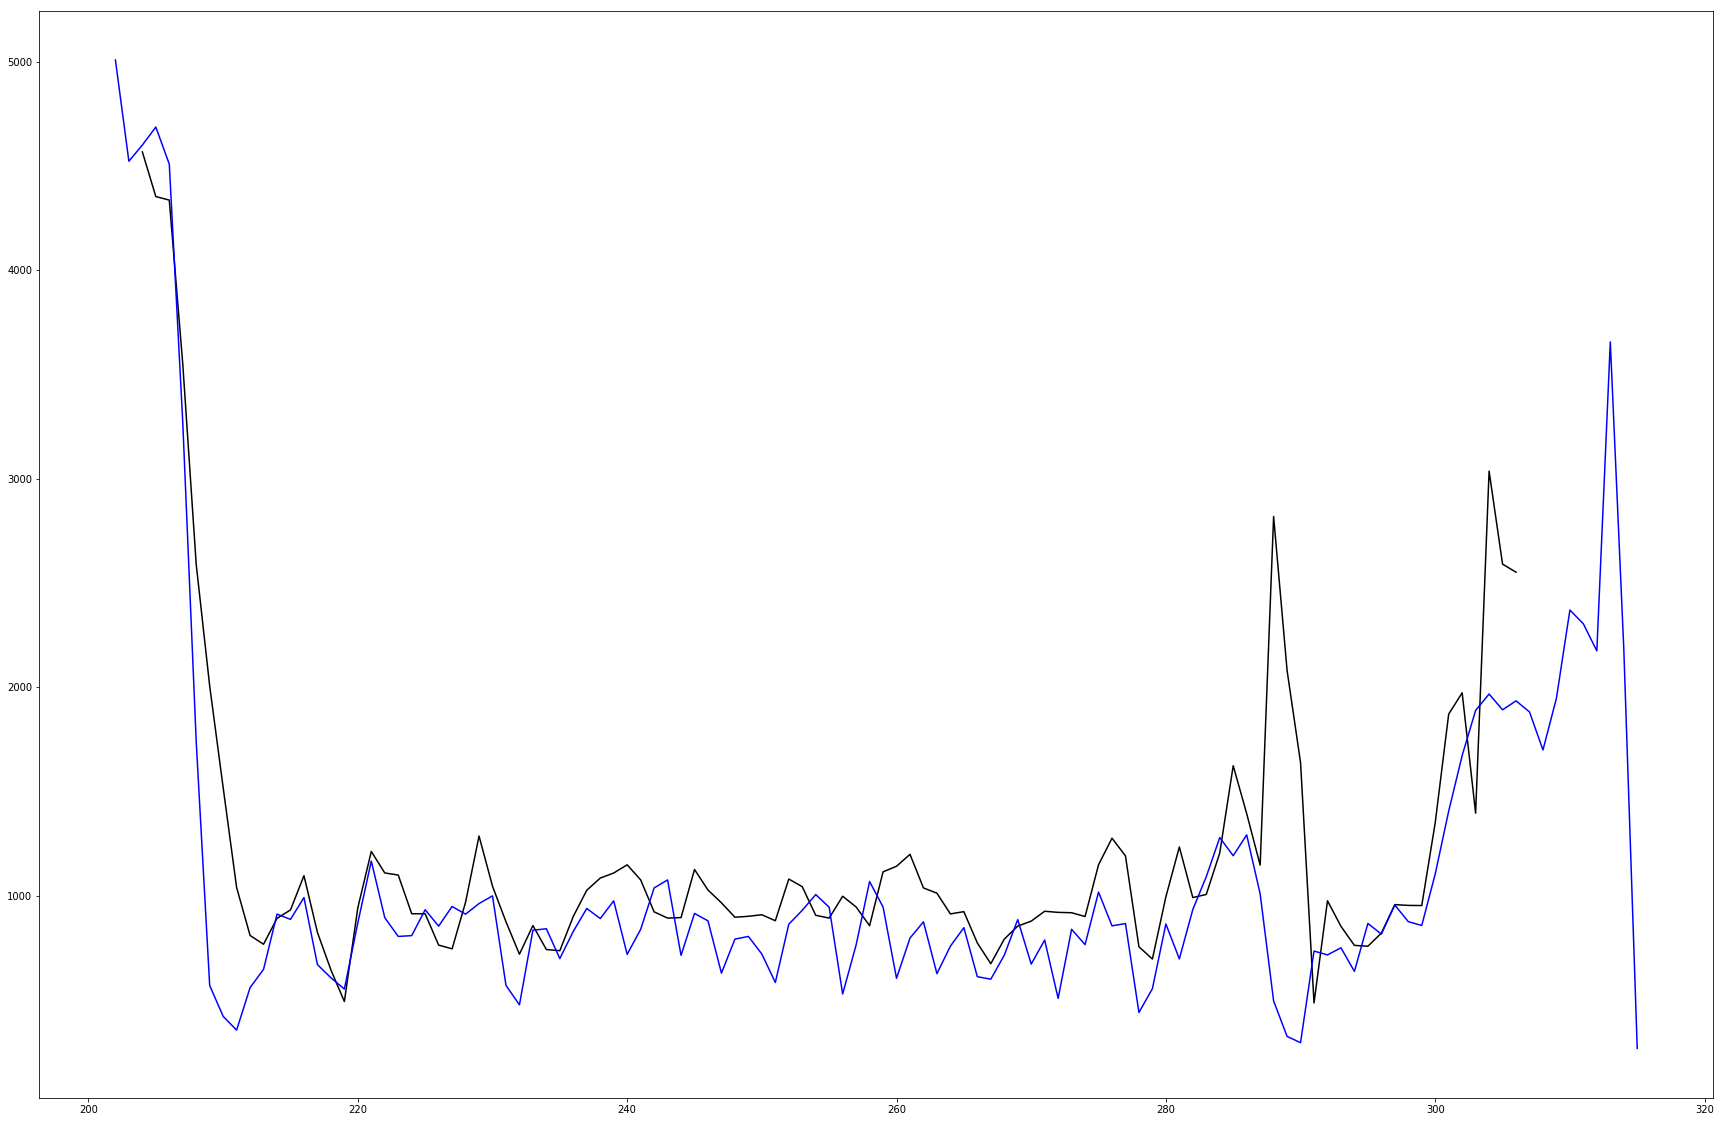

In [107]:
fig, ax = plt.subplots()
ax.plot(  dik["pf{0}".format(circle[0])][:len(dik["pf{0}".format(circle[0])])-1],dik["velo{0}".format(circle[0])], color=(0,0,0), alpha=1)  
ax.plot(  dik["pf{0}".format(circle[1])][:len(dik["pf{0}".format(circle[1])])-1],dik["velo{0}".format(circle[1])], 'b', alpha=1)  
#ax.plot(  dik["pf{0}".format(circle[2])][:len(dik["pf{0}".format(circle[2])])-1],dik["velo{0}".format(circle[2])], 'r', alpha=1)  
#ax.plot(  dik["pf{0}".format(circle[3])][:len(dik["pf{0}".format(circle[3])])-1],dik["velo{0}".format(circle[3])], 'y', alpha=1)  

#plt.ylim(0,2000)
#plt.xlim(0,150)

In [109]:
#maxp=max(plist)
#fig, ax = plt.subplots()
#for i in plist[:]:
#    ax.plot(  dik["pf{0}".format(i)][:len(dik["pf{0}".format(i)])-1],dik["velo{0}".format(i)], color=(1-i/maxp,i/maxp,0.5+0.5*i/maxp), alpha=1)  

#plt.ylim(0,5000)
#plt.xlim(0,leg)


In [103]:
for i in circle[:]:
    print ("particle",i,"(",float(sum(dik["px{0}".format(i)]))/max(len(dik["px{0}".format(i)]),1),",",float(sum(dik["py{0}".format(i)]))/max(len(dik["py{0}".format(i)]),1),")")
    print ("radius",float(sum(dik["rad{0}".format(i)]))/max(len(dik["rad{0}".format(i)]),1))
    print ("velocity",float(sum(dik["velo{0}".format(i)]))/max(len(dik["velo{0}".format(i)]),1))

particle 181 ( 109.374806719 , 83.6627215264 )
radius 32.4061893789
velocity 640.046506717
particle 5789 ( 99.3915570655 , 89.6095509386 )
radius 73.2463356226
velocity 674.450940922


In [57]:
maxf=[]
for i in range(leg):
    maxf.append(len(t1[t1['frame']==i]))
    
#mf=max(maxf)

mf=11

In [58]:
len(t1[t1['frame']==mf])

153

In [59]:
qupx=[]
qupy=[]
quvx=[]
quvy=[]
for i in plist[:]:
    for j in range(len(dik["pf{0}".format(i)])-1):
        if  dik["pf{0}".format(i)][j]==mf:
            qupx.append(dik["px{0}".format(i)][j])
            qupy.append(dik["py{0}".format(i)][j])
            quvx.append(dik["vex{0}".format(i)][j])
            quvy.append(dik["vey{0}".format(i)][j])
            break

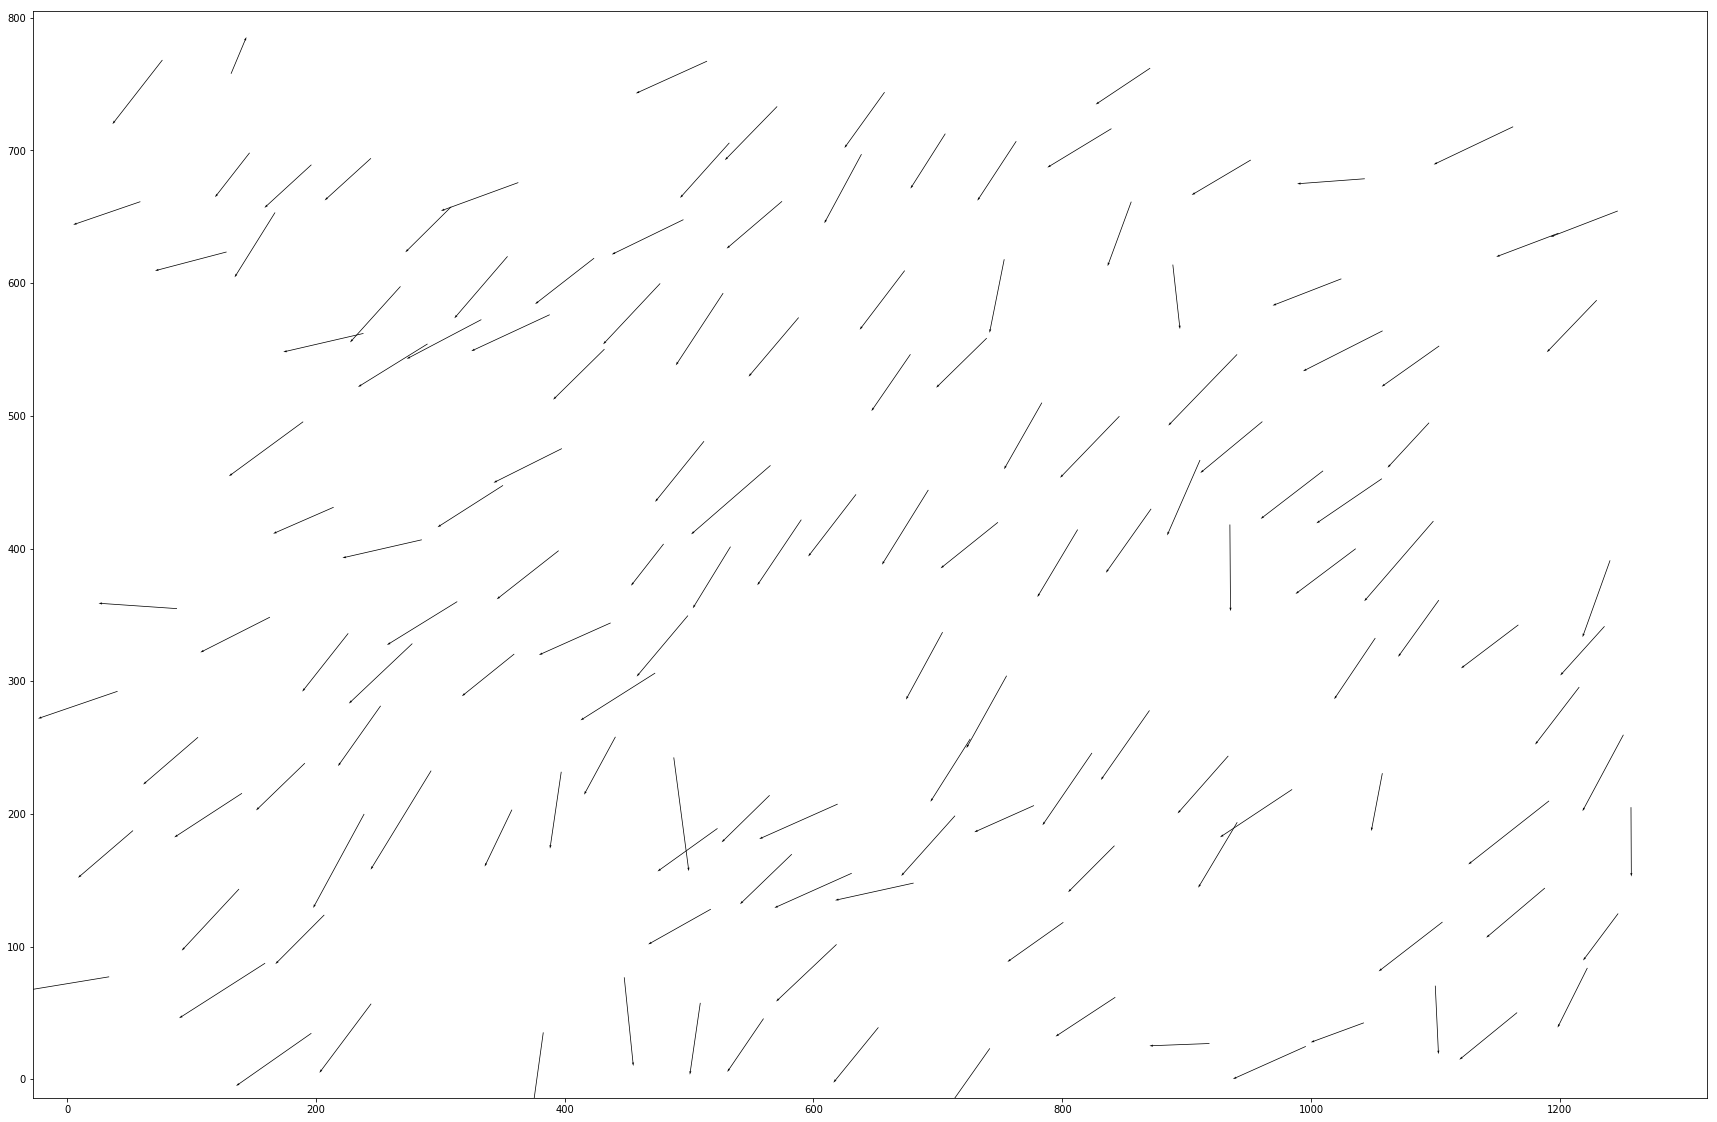

In [60]:
plt.figure()
qu=plt.quiver(qupx,qupy,quvx,quvy,units='inches',width=0.01,color=(0,0,0))


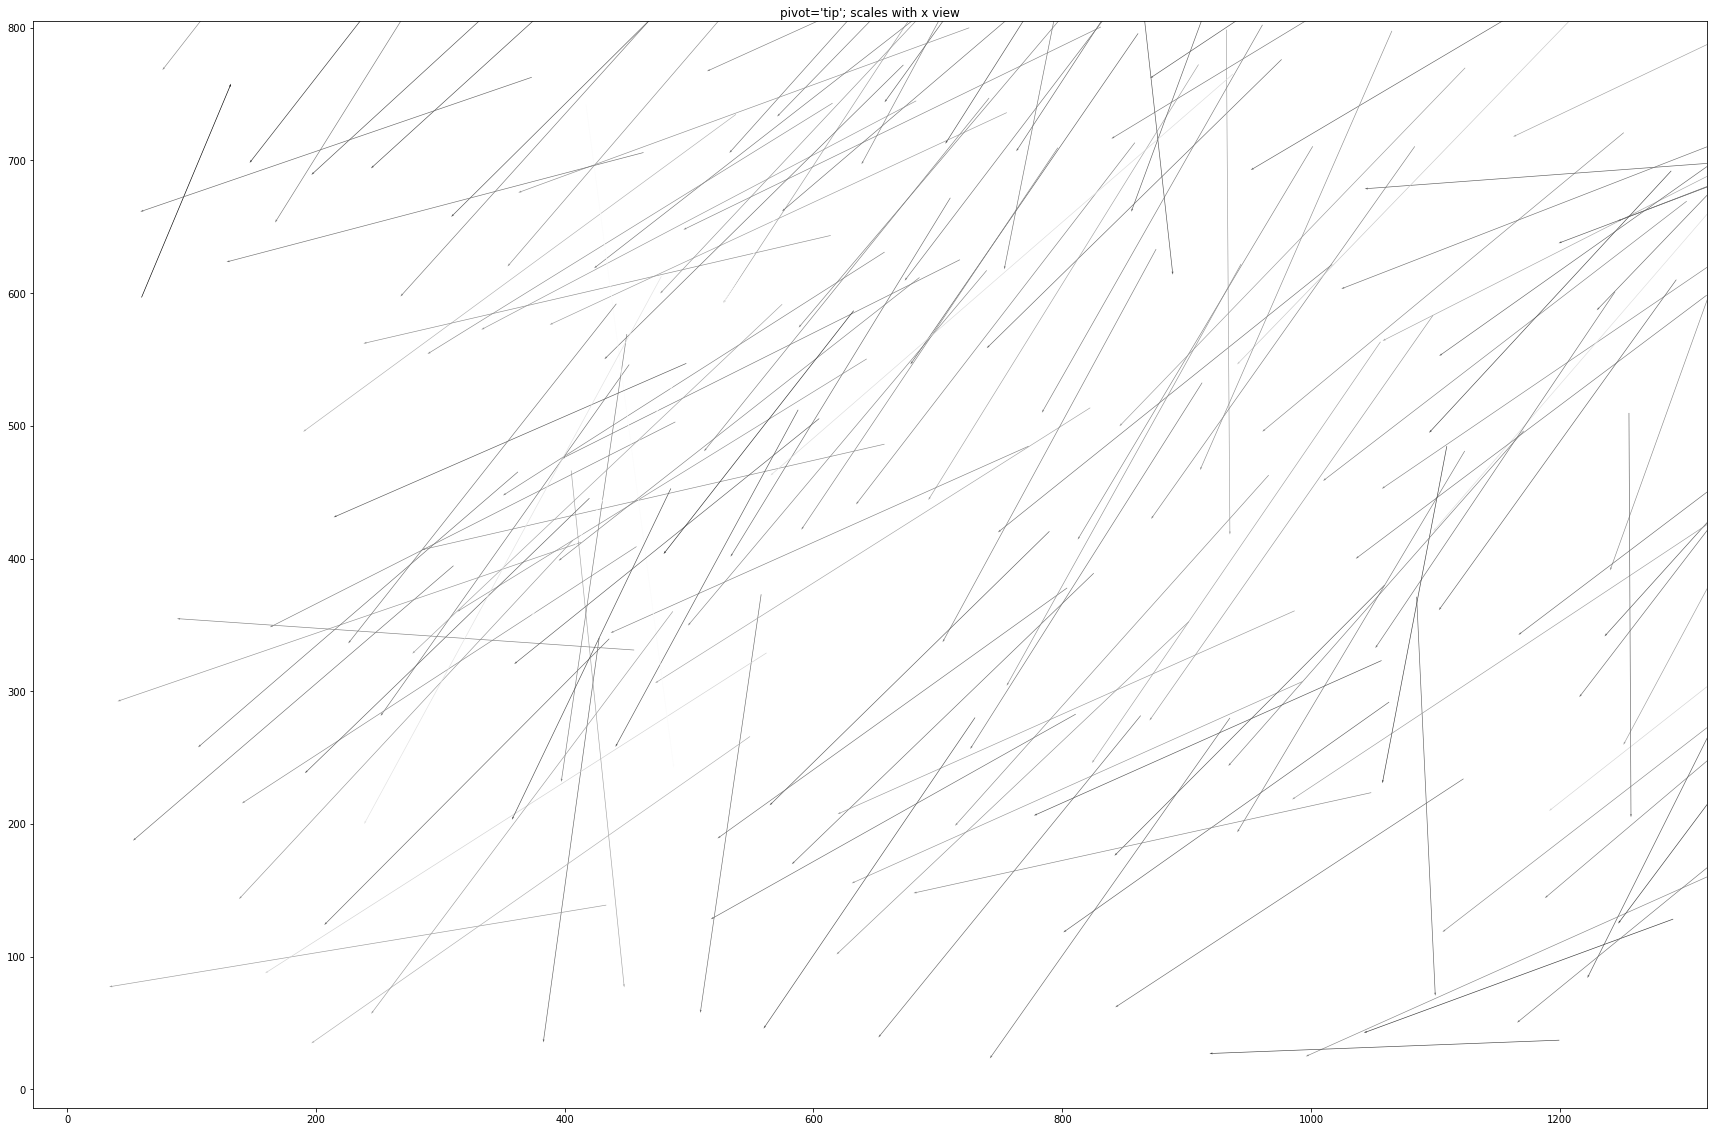

In [78]:
fig3, ax3 = plt.subplots()
ax3.set_title("pivot='tip'; scales with x view")
M = np.hypot(quvx, quvy)
Q = ax3.quiver(qupx,qupy,quvx,quvy, M, units='x', pivot='tip', width=0.5,scale=1 / 0.15,alpha=1)
qk = ax3.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',coordinates='figure')
#ax3.scatter(qupx,qupy, color='k', s=5)

plt.show()